### Exploratory Data Analysis 



The HOUSES dataset contains a collection of recent real estate listings in San Luis Obispo county and around it. The dataset is as a CSV file. The dataset contains the following fields:

1. MLS: Multiple listing service number for the house (unique ID).
2. Location: city/town where the house is located. Most locations are in San Luis Obispo county and northern Santa Barbara county (Santa Maria-Orcutt, Lompoc, Guadelupe, Los Alamos), but there some out of area locations as well.
4. Price: the most recent listing price of the house (in dollars).
5. Bedrooms: number of bedrooms.
6. Bathrooms: number of bathrooms.
7. Size: size of the house in square feet.
8. Price/SQ.ft: price of the house per square foot.
9. Status: type of sale. Thee types are represented in the dataset: Short Sale, Foreclosure and Regular.

Lets import the required libraries that we will be using later. 

In [26]:
from numpy import * # everything 
import pandas as pd 

Let's load the dataset into a pandas dataframe and have a look at the headers.

In [27]:
df = pd.read_csv('data.csv', sep=',', error_bad_lines=False) # read fie as a dataframe

print len(df)    # print number of rows
print list(df)   # print 1st ten headers

781
['MLS', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Size', 'Price/SQ.Ft', 'Status']


Lets take a look at the first 2 rows of the dataframe.

In [28]:
df.head(5)

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale


Next, lets look at a specific column or feature in the dataframe.

In [29]:
print "Bedrooms:", df.Bedrooms.unique()
print "Bathrooms:", df.Bathrooms.unique()

Bedrooms: [ 3  4  2  7  1  5  0  6 10]
Bathrooms: [ 3  4  1  2  5  7  6 11]


What if we want to drop a column from the dataframe?

In [30]:
df = df.drop('Location', 1)

Let's rename the first column.

Hint: A Google search for 'python pandas dataframe rename' points you at this documentation (http://pandas-docs.github.io/pandas-docs-travis/).

In [31]:
print df.columns
df.rename(columns={df.columns[0]:'listing id'}, inplace=True)
df.columns

Index([u'MLS', u'Price', u'Bedrooms', u'Bathrooms', u'Size', u'Price/SQ.Ft',
       u'Status'],
      dtype='object')


Index([u'listing id', u'Price', u'Bedrooms', u'Bathrooms', u'Size',
       u'Price/SQ.Ft', u'Status'],
      dtype='object')

What is the max, min, mean/avg, and standard deviation of the column 'bedroomcnt'?

In [32]:
print "Min: " , min(df['Price/SQ.Ft'])
print "Max: " , max(df['Price/SQ.Ft'])
print "Std: " , df['Price/SQ.Ft'].std()
print "Avg: " , df['Price/SQ.Ft'].mean()



Min:  19.33
Max:  1144.64
Std:  115.08214597649899
Avg:  213.13129321382843


Plot the distribution of 'yearbuild' using matplotlib

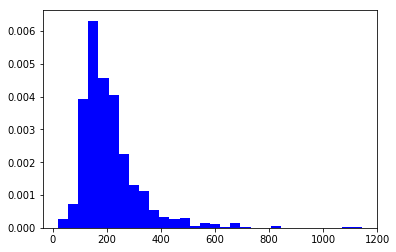

In [33]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

# remove NAN from array
x = df['Price/SQ.Ft'][~np.isnan(df['Price/SQ.Ft'])]

# plot histogram 
n, bins, patches = plt.hist(x, 30, normed=1, facecolor='blue')
plt.show()

One of the best ways to inspect data is visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. 

Since its difficult to visualize more than 2 or 3 features, one possibility is to use a pair plot that looks at all possible pairs of features. The pair plot shows the interaction of each pair of features inorder to visualize any correlation between features. 

(781, 7)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


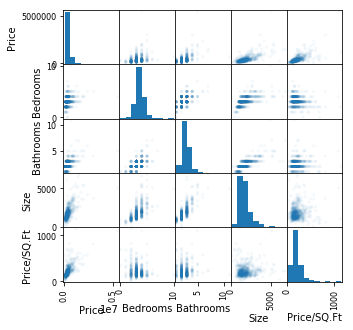

In [34]:
# import the scatter_matrix functionality
import random as rand
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

print df.shape
x = df.iloc[:,[1,2,3,4,5]] # extract only 5 columns from dataframe (using index)
y = x.dropna(thresh=2) # drop any rows that have 2 or more fields as NAN  
a = pd.scatter_matrix(x, alpha=0.05, figsize=(5,5), diagonal='hist')
plt.show()

Let's create a crosstabulation or contingency table of the factors.

Hint: A Google search for 'python pandas cross tabulation' points you at this documentation (http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations).

In [35]:
pd.crosstab(df.Bedrooms, df.Bathrooms)

Bathrooms,1,2,3,4,5,6,7,11
Bedrooms,,,,,,,,
0,2,0,0,0,0,0,0,0
1,10,1,0,0,0,0,0,0
2,33,78,12,0,0,0,0,0
3,20,286,119,5,1,0,0,0
4,0,76,76,19,6,0,0,0
5,0,3,16,9,0,2,1,0
6,0,0,3,0,0,0,1,0
7,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,1


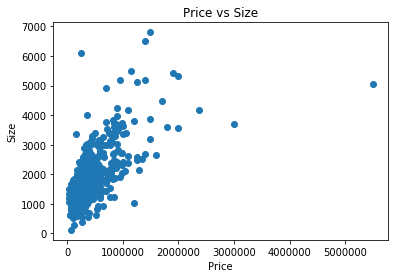

In [36]:
fig=plt.figure()
plt.scatter(df.Price, df.Size)
axis = fig.gca() #get current axis
axis.set_title('Price vs Size')
axis.set_xlabel('Price')
axis.set_ylabel('Size')
fig.canvas.draw()

## Categorical Encoding
If we have categorical or continuous variables and we would like to encode them into discrete integer files (like 0, 1, 2, ...) we can use several tricks in pandas to do this.

In [22]:
# Approach 1 - Pandas makes it easy for us to directly replace the text values with their numeric equivalent by using replace .

newValues = {"Status": {"Foreclosure": 1, "Short Sale": 2, "Regular" : 3}}
df2 = df.replace(newValues, inplace=False )
df2.head()

,listing id,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,795000,3,3,2371,335.30,2
1,134364,399000,4,3,2818,141.59,2
2,135141,545000,4,3,3032,179.75,2
3,135712,909000,4,4,3540,256.78,2
4,136282,109900,3,1,1249,87.99,2


In [39]:
# Approach 2 - Another approach to encoding categorical values is to use a technique called label encoding.
# Label encoding is simply converting each value in a column to a number.

# One trick you can use in pandas is to convert a column to a category, then use those category 
# values for your label encoding. 

df["Status"] = df["Status"].astype('category')
df.dtypes

# Then you can assign the encoded variable to a new column using the cat.codes accessor.
df["Status_cat"] = df["Status"].cat.codes
df.head()

,listing id,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status,Status_cat
0,132842,795000,3,3,2371,335.30,Short Sale,2
1,134364,399000,4,3,2818,141.59,Short Sale,2
2,135141,545000,4,3,3032,179.75,Short Sale,2
3,135712,909000,4,4,3540,256.78,Short Sale,2
4,136282,109900,3,1,1249,87.99,Short Sale,2


In [40]:
"""Approach 3 - Label encoding has the advantage that it is straightforward but it has the 
   disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, 
   the value of 1 is obviously less than the value of 3 but does that really correspond to the data set in real life?
   For example, is "Foreclosure" =1 closer to "Short Sale" =2 compared to "Regular" =3?

   A common alternative approach is called one hot encoding. The basic strategy is to convert each category value 
   into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting 
   a value improperly but does have the downside of adding more columns to the data set.

   Pandas supports this feature using get_dummies. This function is named this way because it creates 
   dummy/indicator variables (aka 1 or 0)."""

pd.get_dummies(df, columns=["Status"], prefix=["new"]).head()

# basically, it creates a 3 new columns (one for each unique value in the column.) with the prefix "new_"

,listing id,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status_cat,new_Foreclosure,new_Regular,new_Short Sale
0,132842,795000,3,3,2371,335.30,2,0,0,1
1,134364,399000,4,3,2818,141.59,2,0,0,1
2,135141,545000,4,3,3032,179.75,2,0,0,1
3,135712,909000,4,4,3540,256.78,2,0,0,1
4,136282,109900,3,1,1249,87.99,2,0,0,1


## Pandas Data Munging

The first concept we deal with here is pandas groupby. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found here (http://pandas-docs.github.io/pandas-docs-travis/).

In [12]:
status_groupby = df.groupby('Status')
status_groupby.head()

,listing id,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,795000,3,3,2371,335.30,Short Sale
1,134364,399000,4,3,2818,141.59,Short Sale
2,135141,545000,4,3,3032,179.75,Short Sale
3,135712,909000,4,4,3540,256.78,Short Sale
4,136282,109900,3,1,1249,87.99,Short Sale
53,143436,1399000,4,3,6500,215.23,Foreclosure
56,143534,789000,3,3,2100,375.71,Foreclosure
63,144314,899000,3,3,2430,369.96,Foreclosure
64,144316,1045000,3,3,2100,497.62,Foreclosure
65,144318,774000,2,2,1550,499.35,Foreclosure


The function groupby gives you a dictionary-like object, with the keys being the values of the factor, and the values being the corresponding subsets of the dataframe.

In [13]:
# lets print the number of rows per each type of status 
for key, value in status_groupby:
    print "( key, len(value) ) = (", key, ",", len(value), ")"
    v=value

( key, len(value) ) = ( Foreclosure , 162 )
( key, len(value) ) = ( Regular , 103 )
( key, len(value) ) = ( Short Sale , 516 )


The groupby function also acts like an object that can be mapped. After the mapping is complete, the rows are put together (reduced) into a larger dataframe. For example, using the describe function. The documentation of the describe function can be found here (http://pandas-docs.github.io/pandas-docs-travis/).

In [14]:
status_df =status_groupby['Bathrooms','Bedrooms','Price','Size','Price/SQ.Ft'].describe()
print type(status_df)
status_df.head(20)

<class 'pandas.core.frame.DataFrame'>


Bathrooms                                               Bedrooms  \
                count      mean       std  min  25%  50%  75%   max    count   
Status                                                                         
Foreclosure     162.0  2.314815  0.807359  1.0  2.0  2.0  3.0   7.0    162.0   
Regular         103.0  2.446602  0.801080  1.0  2.0  2.0  3.0   6.0    103.0   
Short Sale      516.0  2.350775  0.867436  1.0  2.0  2.0  3.0  11.0    516.0   

                        ...        Size         Price/SQ.Ft              \
                 mean   ...         75%     max       count        mean   
Status                  ...                                               
Foreclosure  3.216049   ...     2064.00  6500.0       162.0  200.221605   
Regular      3.048544   ...     2237.50  5060.0       103.0  311.406796   
Short Sale   3.137597   ...     1978.75  6800.0       516.0  197.567326   

                                                                     
                    std    min       25%      50%      75%      max  
Status                                                               
Foreclosure   97.433947  19.33  140.0500  186.780  225.525   686.02  
Regular      189.019573  19.72  200.1000  282.690  369.740  1144.64  
Short Sale    88.248737  34.05  139.9275  175.405  232.130   819.40  

[3 rows x 40 columns]

Another way of printing statistics using group by is shown below, without having to iterate through each item in the dataframe. You can find documentation about std function here (http://pandas-docs.github.io/pandas-docs-travis/).

In [15]:
status_df =df.groupby('Status').std()
print status_df

              listing id          Price  Bedrooms  Bathrooms        Size  \
Status                                                                     
Foreclosure  2691.998699  270124.016966  0.956956   0.807359  880.295908   
Regular        71.974328  675214.007648  0.832886   0.801080  826.470618   
Short Sale   4240.579781  236519.660193  0.825834   0.867436  795.330609   

             Price/SQ.Ft  
Status                    
Foreclosure    97.433947  
Regular       189.019573  
Short Sale     88.248737  
